# The Sparks Foundation: Data science and Business Analytics Tasks

<img src="https://internship.thesparksfoundation.info/assests/img/logo.png"  width="300" height="300">

## Task6 : Predicition using Decision Tree Algorithm

## Author Batool Hammoud

### import libraries

In [159]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.datasets as datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder #for train test splitting
from sklearn.model_selection import train_test_split #for decision tree object
from sklearn.tree import DecisionTreeClassifier #for checking testing results
from sklearn.metrics import classification_report, confusion_matrix #for visualizing tree 
from sklearn.tree import plot_tree

### loading data

In [160]:
# loading data
iris = datasets.load_iris()
df = pd.DataFrame(iris.data, columns= iris.feature_names)
print(df.head(5))
y = iris.target
print(y)
all_inputs = df
all_classes = pd.DataFrame(y, columns=['target'])

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


**We have had an overview of the data set on the previous task**

### Decision Tree Algorithm 

In [161]:
# Splitting data into training and testing data set for all trys
x_train, x_test,y_train,y_test = train_test_split(all_inputs,all_classes, test_size=0.2, random_state=0)


## **We can use different criterion Entropy or Gini index**

## Entropy

In [162]:
#C4.5 Entropy
modelEntropy = DecisionTreeClassifier(criterion='entropy', random_state=42)
modelEntropy.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

### Feature importance

In [163]:
#Printing Feature importance
def featureImportants(best_tree, all_inputs):
    print( all_inputs.columns)
    print (best_tree.feature_importances_)
featureImportants(modelEntropy, all_inputs)

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')
[0.01054122 0.         0.65386973 0.33558905]


### Visualizing the Tree

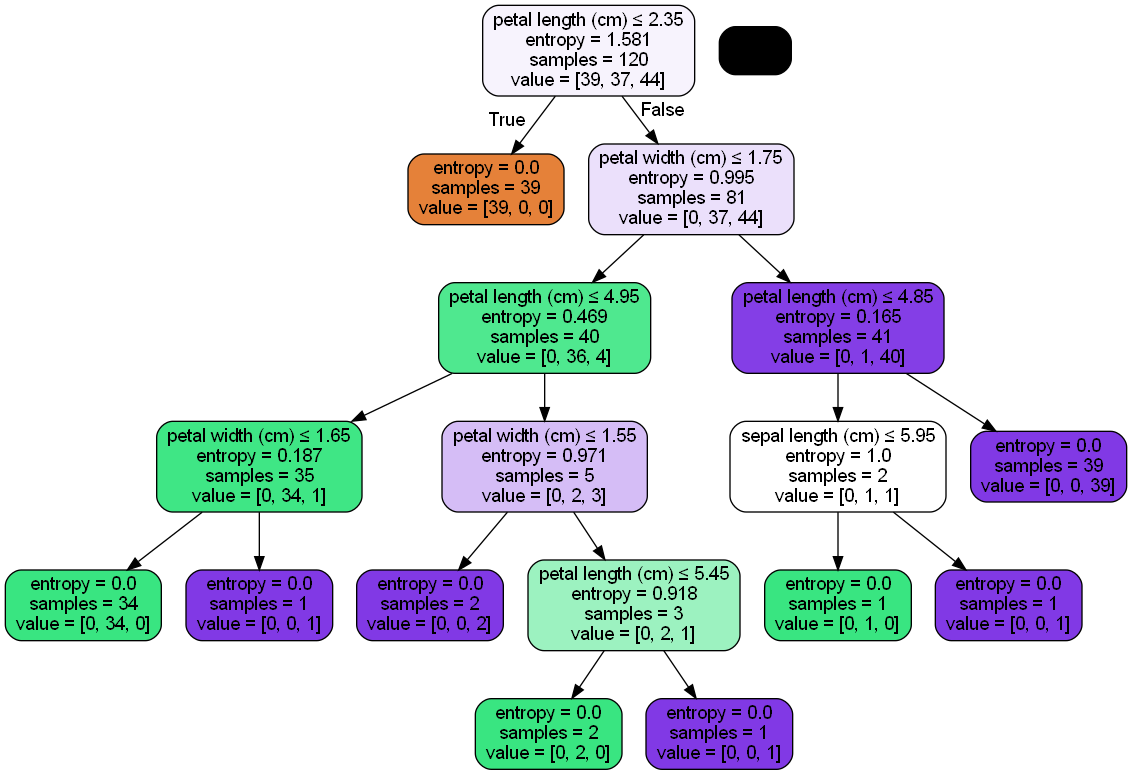

In [164]:
#Visaulizing the tree
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus
import pygraphviz
def visualizeTree(best_tree, tree_name):
    dot_data = StringIO()
    export_graphviz(best_tree, out_file=dot_data, feature_names=iris.feature_names,  
                filled=True, rounded=True,
                special_characters=True)
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    graph.write_png(tree_name+".png")
    return (Image(graph.create_png()))
visualizeTree(modelEntropy, "C4.5 Entropy")

## Gini Index

In [165]:
# Gini index
modelGini = DecisionTreeClassifier(criterion='gini', random_state=42)
modelGini.fit(x_train, y_train)

DecisionTreeClassifier(random_state=42)

### Feature Importance

In [166]:
featureImportants(modelGini, all_inputs)

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')
[0.01253395 0.         0.56061205 0.426854  ]


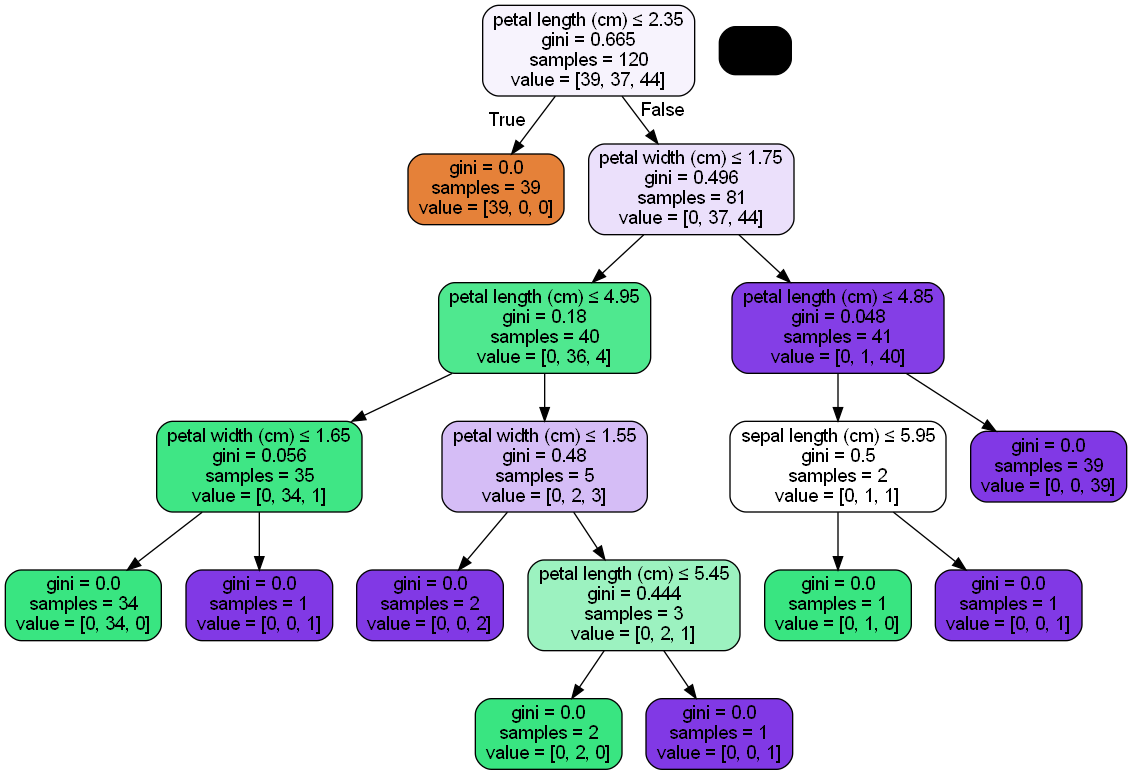

In [176]:
#visualizing the tree
visualizeTree(modelGini, "C4.5 Gini")

## Evaluation 

In [178]:
modelGini.score(x_test, y_test)

1.0

In [179]:
modelEntropy.score(x_test, y_test)

1.0

## Cross Validation 

In [170]:
#confusion_matrix_acc For accuracy
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
def confusion_matrix_acc(best_tree, x_test, y_test, cv):
    print ("cross_val_score is \n",cross_val_score(best_tree, x_test, y_test, cv=cv, scoring="accuracy")) #cv: cross validation
    y_test_pred = cross_val_predict(best_tree, x_test, y_test, cv=cv)
    #This means that you get a clean prediction for each instance in the training set
    conf_mx = confusion_matrix(y_test, y_test_pred)
    print("confusion_matrix \n",conf_mx)
    plt.matshow(conf_mx, cmap=plt.cm.gray)
    plt.show()
    #Error Analysis
    #plot on the errors
    row_sums = conf_mx.sum(axis=1, keepdims=True) # sum of row class
    norm_conf_mx = conf_mx / row_sums #divide each value in the confusion matrix by the sum of row class
    np.fill_diagonal(norm_conf_mx, 0) #fill the diagonal with zeros to keep only the errors
    #plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
    #plt.show()
    
    return (y_test_pred)

cross_val_score is 
 [0.925 0.975 0.95 ]
confusion_matrix 
 [[39  0  0]
 [ 0 34  3]
 [ 0  3 41]]


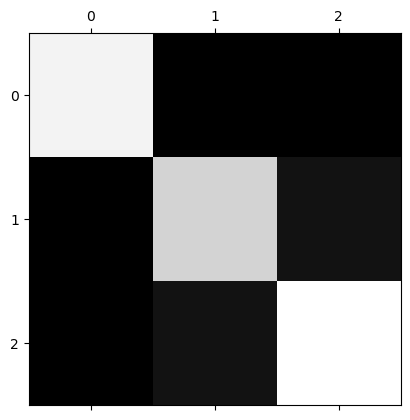

In [171]:
x = confusion_matrix_acc(modelGini, x_train, y_train, cv = 3)

**The training evaluation : cross_val_score is [0.925, 0.975, 0.95 ]**
the graph shows predictions and errors using confusion matrix 


cross_val_score is 
 [0.9 0.9 0.5]
confusion_matrix 
 [[11  0  0]
 [ 3  9  1]
 [ 1  2  3]]


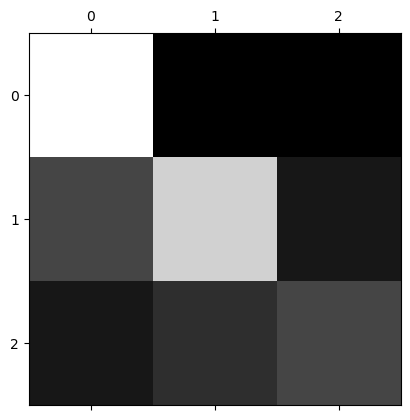

In [172]:
preds = confusion_matrix_acc(modelGini, x_test, y_test, cv = 3)

**The validation evaluation : cross_val_score is [0.9, 0.9, 0.5]**
the graph shows predictions and errors using confusion matrix 


In [173]:
ytest = [item[0] for item in y_test.values]
df = pd.DataFrame({'Actual': yTest, 'Predicted': preds})  
df.head(10)

,Actual,Predicted
0,2,2
1,1,1
2,0,0
3,2,2
4,0,0
5,2,2
6,0,0
7,1,1
8,1,2
9,1,1
